In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\sales_data_Cleaned.csv")

In [3]:
df['Location'].value_counts()

Location
L04    135272
L07     87870
L03     80750
L01     65031
L10     31554
L05     27733
L06     25590
L08     19555
L02     12930
L09      8535
Name: count, dtype: int64

In [17]:
df.sample(10)

,ProductID,Location,Date,UnitsSold,PromoCodeUsed
244835,P0426,L01,2024-10-06,0,No
370282,P0360,L03,2024-09-22,1,No
633,P0495,L03,2024-03-31,7,No
385506,P0262,L02,2024-10-19,3,No
286692,P0458,L04,2024-05-17,6,Yes
471684,P0028,L03,2024-09-06,6,Yes
472218,P0365,L01,2024-04-03,6,No
176285,P0426,L01,2024-03-01,4,No
163930,P0421,L04,2024-05-03,6,No
81700,P0461,L01,2024-05-16,9,No


# Univariate Analysis

# PromoCode Used – Countplot

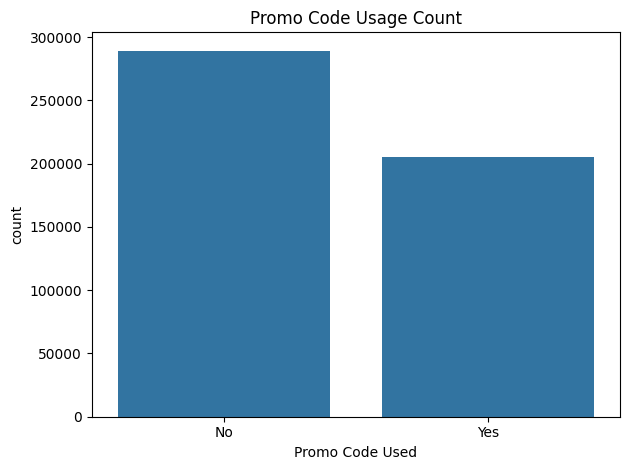

In [18]:
sns.countplot(data=df, x='PromoCodeUsed')
plt.title("Promo Code Usage Count")
plt.xlabel("Promo Code Used")
plt.tight_layout()
plt.show()


#  Location-wise Order Count

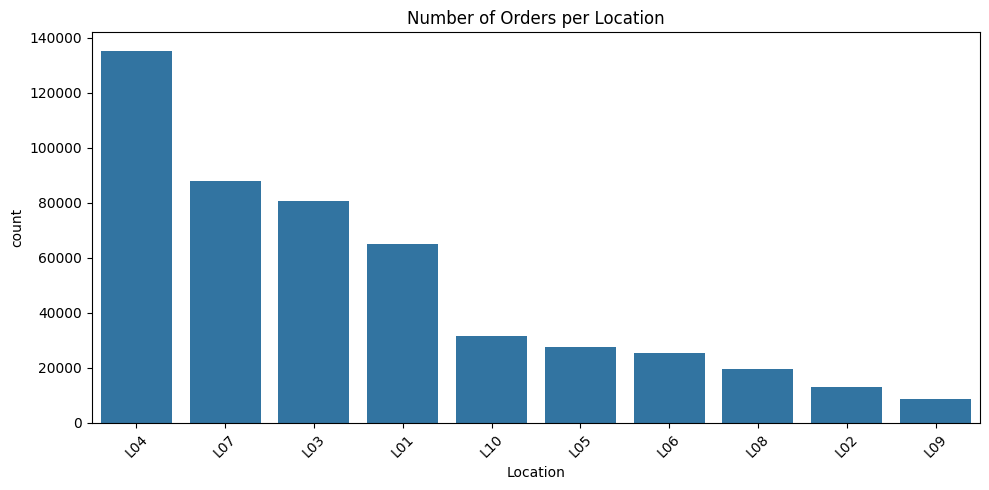

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title("Number of Orders per Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# UnitSold

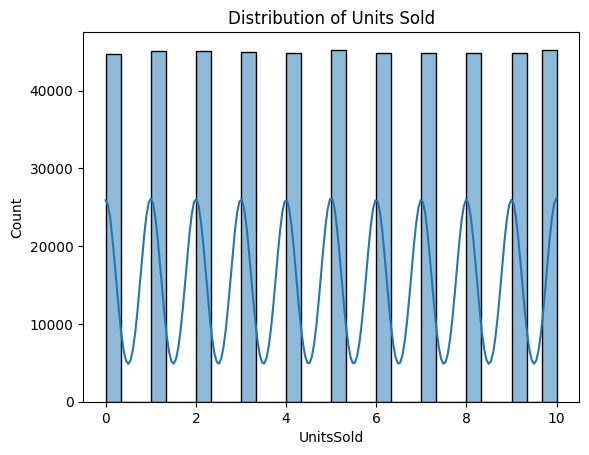

In [4]:
import seaborn as sns
sns.histplot(df['UnitsSold'], bins=30, kde=True)
plt.title("Distribution of Units Sold")
plt.show()

# Top Selling Products

In [6]:
df['ProductID'].value_counts()

ProductID
P0271    1069
P0344    1068
P0045    1066
P0487    1066
P0048    1065
         ... 
P0381     911
P0061     911
P0317     910
P0227     910
P0060     901
Name: count, Length: 500, dtype: int64

Unique Products: 500
ProductID
P0045    5485
P0487    5483
P0468    5448
P0278    5405
P0063    5384
P0165    5381
P0435    5375
P0221    5348
P0265    5346
P0377    5340
Name: UnitsSold, dtype: int64


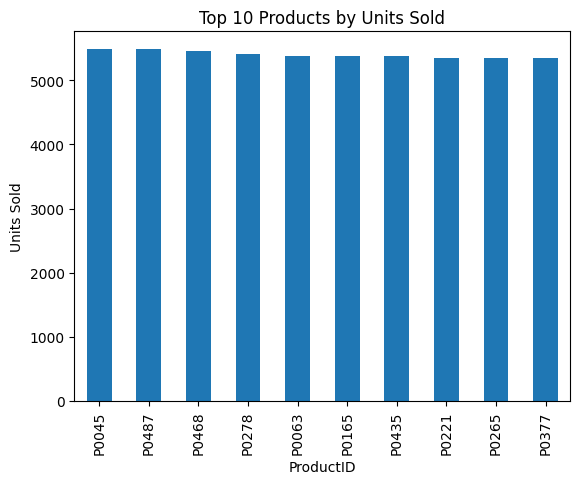

In [5]:
print("Unique Products:", df['ProductID'].nunique())
top_products = df.groupby('ProductID')['UnitsSold'].sum().sort_values(ascending=False).head(10)
print(top_products)

top_products.plot(kind='bar', title='Top 10 Products by Units Sold')
plt.ylabel('Units Sold')
plt.show()

# Date (Time-based Feature)

Date Range: 2024-01-01 00:00:00 to 2024-12-30 00:00:00
Missing Dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


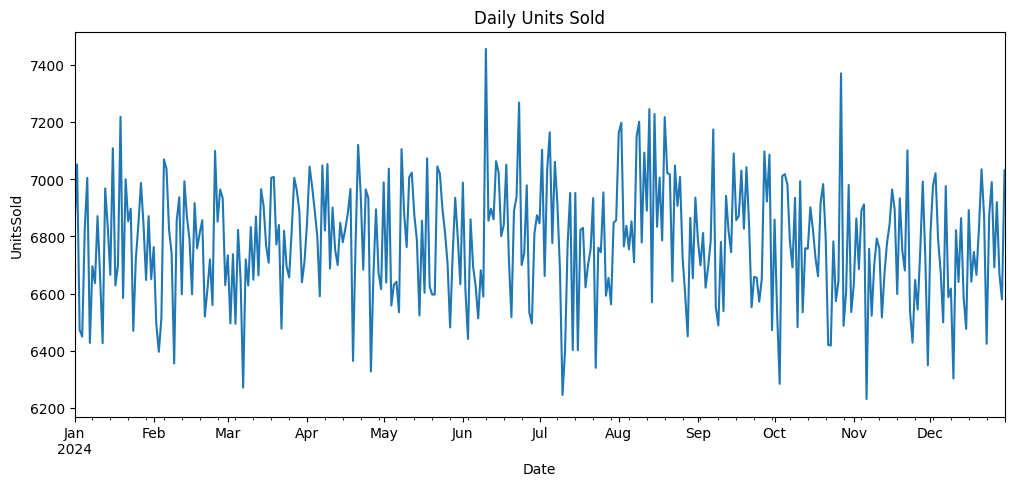

In [7]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check range and missing dates
print("Date Range:", df['Date'].min(), "to", df['Date'].max())
print("Missing Dates:", pd.date_range(df['Date'].min(), df['Date'].max()).difference(df['Date'].unique()))

# Plot daily sales
daily_sales = df.groupby('Date')['UnitsSold'].sum()
daily_sales.plot(figsize=(12,5), title='Daily Units Sold', ylabel='UnitsSold')
plt.show()


Location
L04    676402
L07    437941
L03    404475
L01    325097
L10    158621
L05    138264
L06    127601
L08     98112
L02     65113
L09     43032
Name: UnitsSold, dtype: int64


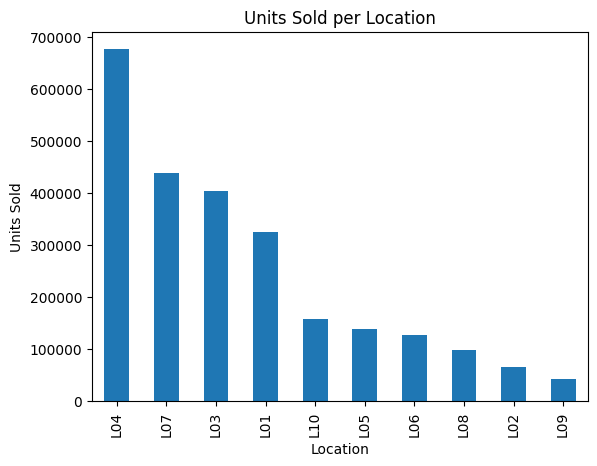

In [8]:
location_sales = df.groupby('Location')['UnitsSold'].sum().sort_values(ascending=False)
print(location_sales)

location_sales.plot(kind='bar', title='Units Sold per Location')
plt.ylabel('Units Sold')
plt.show()
